Churn is a measurement of business that shows customers who stop doing business with a company or a service, also known as customer attrition. By following this metric, what most businesses could do was try to understand the reason behind churn numbers and tackle those factors, with reactive action plans.
The main goal is to develop a machine learning model capable to predict customer churn based on the customer's data available. 
To accomplish that,i will go through the below steps:

* Exploratory data analysis
* Data preparation
* Train, tune and evaluate machine learning models

**Importing Libraries**

In [1]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\koket\anaconda3\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install scikit-plot

In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

import pickle

import scikitplot as skplt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
sns.set_style('darkgrid')
palette = sns.color_palette("coolwarm", 7)


## The Data

This dataset contains a total of 7,043 customers and 21 attributes, coming from personal characteristics, services signatures, and contract details. Out of the entries, 5,174 are active customers and 1,869 are churned, which demonstrates that the dataset is highly unbalanced. The target variable for this assessment is going to be the feature Churn.

## Importing the dataset

In [4]:
data_path=('Telco-Customer-Churn.csv')
df_churn = pd.read_csv(data_path)

## EDA

In [5]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### *Data Dictionary*

*	`customerID` - Custumer unique identifier
*	`gender` - Customer gender - ['Female' 'Male']
*	`SeniorCitizen` - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
*	`Partner` - - ['No' 'Yes']
*	`Dependents` - If customer has dependents - ['No' 'Yes']
*	`Tenure` - Customer lifespan (in months)
*	`PhoneService` - - ['No' 'Yes']
*	`MultipleLines` - - ['No' 'No phone service' 'Yes']
*	`InternetService` - - ['No' 'No internet service' 'Yes']
*	`OnlineSecurity` - - ['No' 'No internet service' 'Yes']
*	`OnlineBackup` - - ['No' 'No internet service' 'Yes']
*	`DeviceProtection` - - ['No' 'No internet service' 'Yes']
*	`TechSupport` - - ['No' 'No internet service' 'Yes']
*	`StreamingTV` - - ['No' 'No internet service' 'Yes']
*	`StreamingMovies` -  - ['No' 'No internet service' 'Yes']
*	`Contract` - Type of contract - ['Month-to-month' 'One year' 'Two year']
*	`PaperlessBilling` - - ['No' 'Yes']
*	`PaymentMethod` - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
*	`MonthlyCharges` - Monthly Recurring Charges
*	`TotalCharges` - Life time value
*	`Churn` - Churn value, the targer vector - ['No' 'Yes']



In [6]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
def get_df_size(df_churn, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df_churn.shape[1], 
        '\n# Entries: ', df_churn.shape[0],'\n')
  
get_df_size(df_churn)

Dataset dimensions 
# Attributes:  21 
# Entries:  7043 



In [9]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The feature `TotalCharges` got read by Pandas as `object` data type. This have impacts during the exploratory analysis and have to be handled. We will convert datatype to `float64` in the coming sections.

In [10]:
# replacing all the blank values with NaN 
df_clean = df_churn.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(df_clean.isnull().sum()))

Missing values (per feature): 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



After that we can see that feature `TotalCharges` has 11 missing values. We are going to replace these missing values by the `TotalCharges` median.

In [11]:
total_charges_median = df_clean.TotalCharges.median()
df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)

### Converting data types

While importing dataset, Pandas read the column `TotalCharges` as object because it had some entries populated with blank spaces instead of `NaN` value. For the analysis we will convert datatype of this feature from `object` to `float64`.

In [12]:
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(pd.to_numeric)

 The customerID he feature does not contribute for this analysis, therefore we are going to drop the column.

In [13]:
df_clean = df_clean.drop('customerID', axis=1)

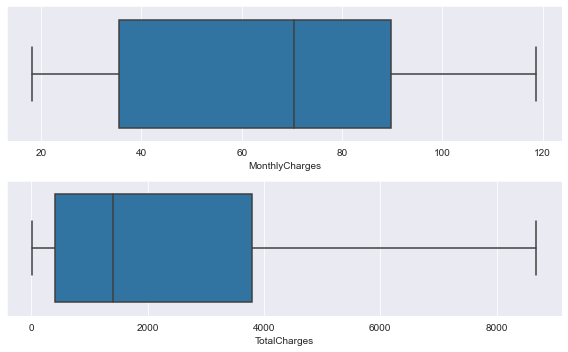

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,5))

sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])

plt.tight_layout()

### *Dataset features and their values*

This is a very important information to help us to undesrstand the dataset will be working with. Few observations:


*   Feature `SeniorCitizen` is binary, entries have value 1 for **Yes** and 0 for **No**
*   Feature `Tenure` has the max value in 72, which can indicate that this service provider has maximum of 6 years
*   The only features that are not categorical are `Monthly Charges` and `TotalCharges`, all the remaining are categorical kinds


In [15]:
features_obj = df_clean.columns

for f in features_obj:
  print(f)
  print(np.unique(df_clean[f].values))

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
tenure
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
PhoneService
['No' 'Yes']
MultipleLines
['No' 'No phone service' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'No internet service' 'Yes']
OnlineBackup
['No' 'No internet service' 'Yes']
DeviceProtection
['No' 'No internet service' 'Yes']
TechSupport
['No' 'No internet service' 'Yes']
StreamingTV
['No' 'No internet service' 'Yes']
StreamingMovies
['No' 'No internet service' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['No' 'Yes']
PaymentMethod
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
MonthlyCharges
[ 18.25  18.4   18.55 ... 118.6  118.65 118.75]
TotalCharges
[  18.8 

In [16]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()

#### *How long is the customer lifespan until subscription cancellation?*

We can see that the largest majority part of customers drops or don't renew their membership in the first month, adding up to 20, 3% of clients that defect

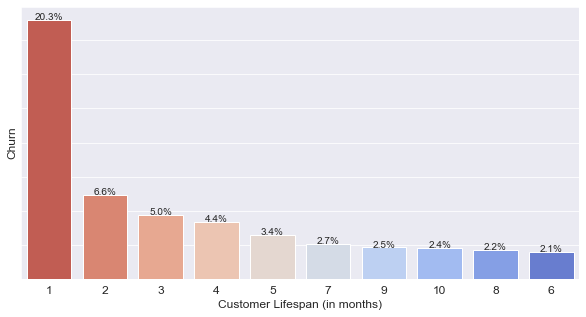

In [17]:
p = sns.color_palette("coolwarm", 10)
p.reverse()

df_top_churn = pd.DataFrame(df_clean[df_clean['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df_clean[df_clean['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10].tenure, ax=ax, palette=p, order=df_top_churn[:10].index)
plt.xticks(size=12)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)

sns_lifespan.figure.savefig("churn_rate_tenure.png", dpi=600)

In [18]:
# helper funtion - display count plot
def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5), export=False):
  
  """
    Display countplot based on a set of features

    # Arguments
      cat_list: array, List of features
      df: DataFrame, dataset
      rows: int, number of rows
      columns: int, number of columns
      figsize: figure size, e.g (10, 5)

  """

  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=df[c], data=df, palette=palette)

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, df.shape[0])

  if export :
    save_img(fig, ax)

  plt.tight_layout()
  plt.show()

  return fig

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")

def save_img(fig, ax):
  fig.savefig(ax.get_title(), dpi=600)

In [19]:
df_churn = df_clean[df_clean['Churn'] == 'Yes']
df_churn = df_churn.drop('Churn', axis=1)

df_churn.loc[df_churn['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
df_churn.loc[df_churn['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

personal_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services_attributes = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies']
contract_attributes = ['Contract', 'PaperlessBilling', 'PaymentMethod']
tenure_attribute=['tenure','TotalCharges','MonthlyCharges']

#### *a) In terms of personal attibutes*

Let's review which personal charactiristic contribute mostly for the cancellation decision. From the available dataset those are:

*   `Gender`
*   `SeniorCitizen`
*   `Partner`
*   `Dependents`

Below charts can provide some meaningful insights such as:
* Customers without dependents are 4 times more likely to churn
* Senior citizens are 3 times less likely to churn
* Partners are almost 2 times less likely to churn


In [20]:
#displayCountPlot(tenure_attribute, df_churn, rows=1, columns=4, export=True)

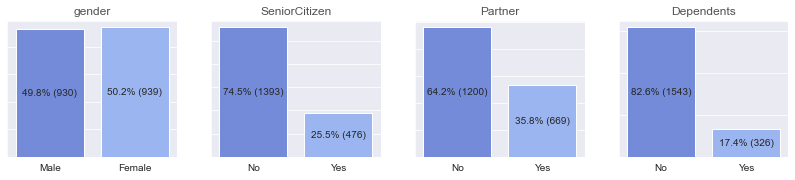

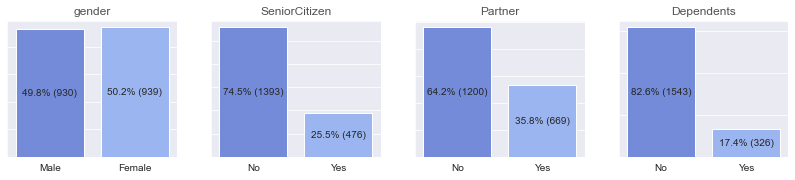

In [21]:
displayCountPlot(personal_attributes, df_churn, rows=1, columns=4, export=True)

#### *b) In terms of services*

Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

*	`PhoneService`
*	`MultipleLines`
*	`InternetService`
*	`OnlineSecurity`
*	`OnlineBackup`
*	`DeviceProtection`
*	`TechSupport`
*	`StreamingTV`
*	`StreamingMovies`

The below charts show the features where high discrepancies between the classes could be noticed. It gives insights regarding which kind of carrier services the customers that are more likely to defeat make use:
* The majority of customers that cancel their subscription have Phone Service enabled
* Customers that have Fiber-Optic Internet Service are more likely to cancel than those who have DSL
* Customers that do not have Online Security, Device Protection, Online Backup, and Tech Support services enabled are more likely to leave



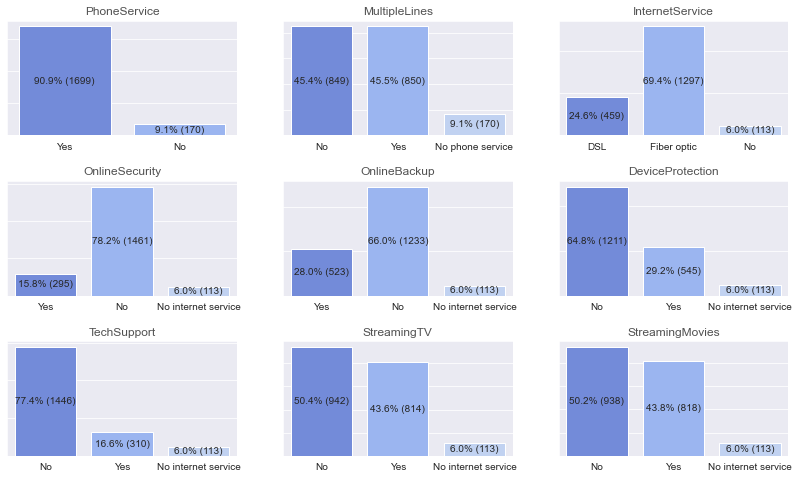

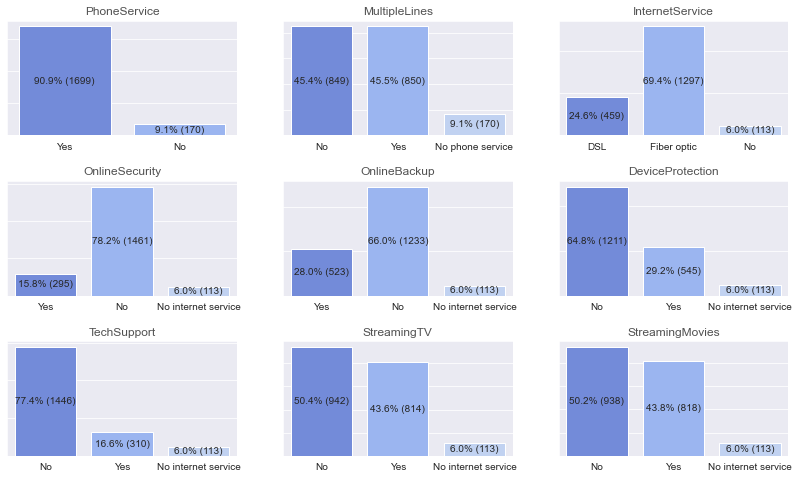

In [22]:
displayCountPlot(services_attributes, df_churn, rows=3, columns=3, figsize=(14,8), export=True)

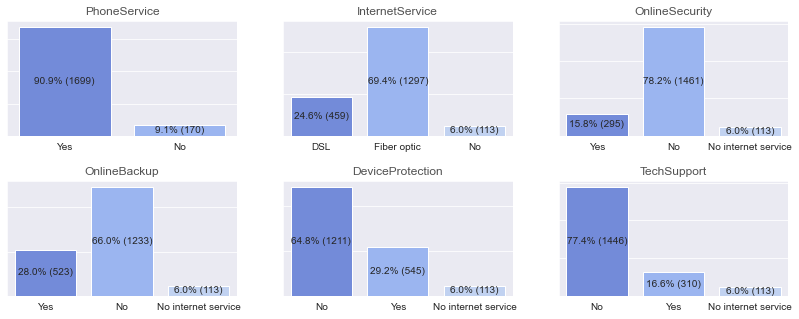

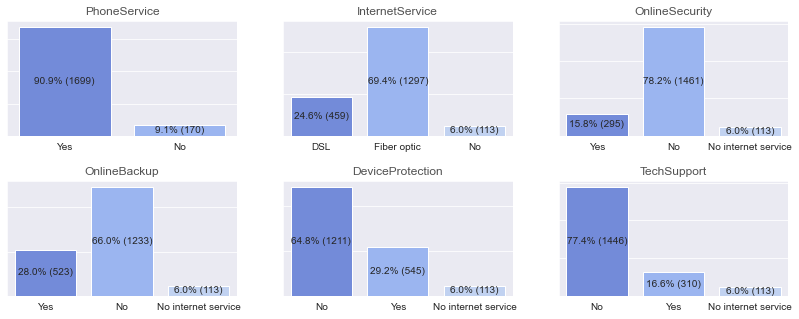

In [23]:
services_attributes_filtered = ['PhoneService', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport',]

displayCountPlot(services_attributes_filtered, df_churn, rows=3, columns=3, figsize=(14,8), export=True)

#### *c) In terms of contract aspects*

Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

*	`Contract`
*	`PaperlessBilling`
*	`PaymentMethod`

Below charts give insights regarding the contract aspects that can make a subscriber more likely to churn:
* The majority of customers that cancel their subscription have
Month-to-month Contract type and Paperless Billing enabled
* Customers that have Payment Method as Eletronic Check are more likely to leave

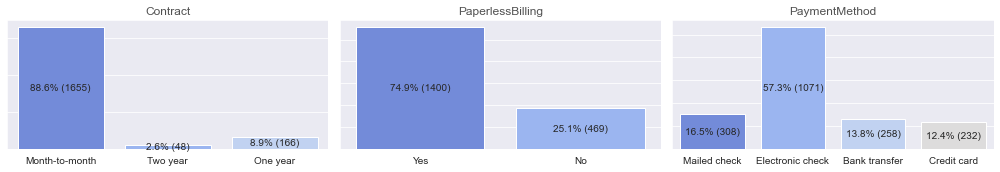

In [24]:
df_churn['PaymentMethod'] = df_churn['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()

fig = displayCountPlot(contract_attributes, df_churn, rows=1, columns=3)

fig.savefig("contract.png", dpi=600)

### *Imbalanced data*

Column `Churn` is the target variable to be used to train the ML models. The class `No` have much more entries then class `Yes`, which demonstrates that the dataset is highly imbalanced. Ideally the dataset should be balanced to avoid models overfitting.

5174
1869


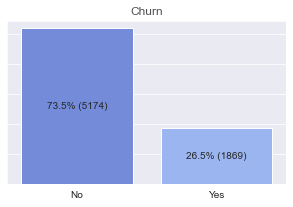

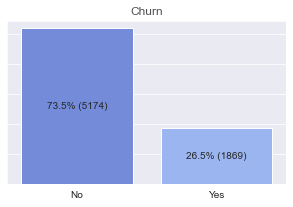

In [25]:
print(df_clean[df_clean['Churn'] == 'No'].shape[0])
print(df_clean[df_clean['Churn'] == 'Yes'].shape[0])

"""fig, ax = plt.subplots()
sns.countplot(df_clean['Churn'], palette=palette)

plt.xticks(size=12)
plt.xlabel('Churn', size=12)
plt.yticks(size=12)
plt.ylabel('# Customers', size=12)"""

displayCountPlot(['Churn'], df_clean, rows=1, columns=1, figsize=(5,3), export=True)



**DATA MANIPULATION**

Encoding all categorical variables

In [26]:
binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]

df_proc = df_clean.copy()

In [27]:
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])

In [28]:
print(i, '\n', np.unique(df_proc[f].values))

Churn 
 [0 1]


# Getting Dummy Variables for other Categorical Features

In [29]:
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
features_obj = df_proc.columns

for f in features_obj:
  print(f)
  print(np.unique(df_proc[f].values))

gender
[0 1]
SeniorCitizen
[0 1]
Partner
[0 1]
Dependents
[0 1]
tenure
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
PhoneService
[0 1]
MultipleLines
['No' 'No phone service' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'No internet service' 'Yes']
OnlineBackup
['No' 'No internet service' 'Yes']
DeviceProtection
['No' 'No internet service' 'Yes']
TechSupport
['No' 'No internet service' 'Yes']
StreamingTV
['No' 'No internet service' 'Yes']
StreamingMovies
['No' 'No internet service' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
[0 1]
PaymentMethod
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
MonthlyCharges
[ 18.25  18.4   18.55 ... 118.6  118.65 118.75]
TotalCharges
[  18.8    18.85   18.9  ... 8670.1  8672.45 868

In [31]:
cleanup_num1 = {"MultipleLines":   {"No": 0, "No phone service": 1, "Yes": 2},
              "InternetService":  {"DSL": 2, "Fiber optic": 1, "No": 0},
             "OnlineSecurity": {"Yes": 1, "No internet service": 2, "No": 0}, 
              "OnlineBackup": {"Yes": 1, "No internet service": 2, "No": 0},
              "DeviceProtection": {"Yes": 1, "No internet service": 2, "No": 0},
               "TechSupport": {"Yes": 1, "No internet service": 2, "No": 0},
               "StreamingTV": {"Yes": 1, "No internet service": 2, "No": 0},
               "StreamingMovies":{"Yes": 1, "No internet service": 2, "No": 0},
               "Contract":   {"Month-to-month": 0, "One year": 1, "Two year": 2},
               "PaymentMethod":   {"Bank transfer (automatic)": 0, "Credit card (automatic)": 1, "Electronic check": 2, "Mailed check": 3}}

In [32]:
df_proc.replace(cleanup_num1, inplace=True)
df_proc.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,2,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,2,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,1,0,0,1,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,2,1,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,2,1,1,0,0,0,0,1,0,0,56.15,3487.95,0


**Observations**

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

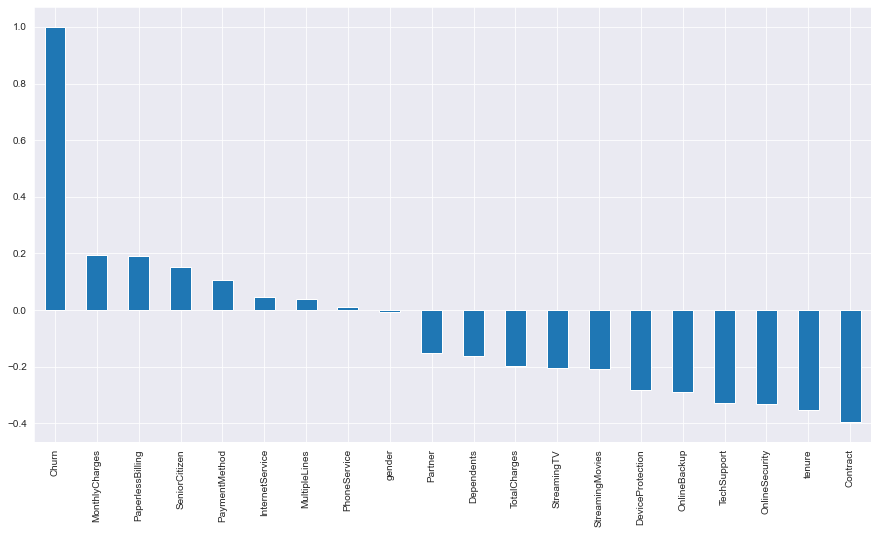

In [33]:
plt.figure(figsize=(15,8))
df_proc.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The 'No Internet service' in various categorical variables seem to be strongly correlated with each other.Their coorelation with the target variable is on the lower side.So I won;t worry right now about their effect the model.I can did into it deeper once I have a final model.

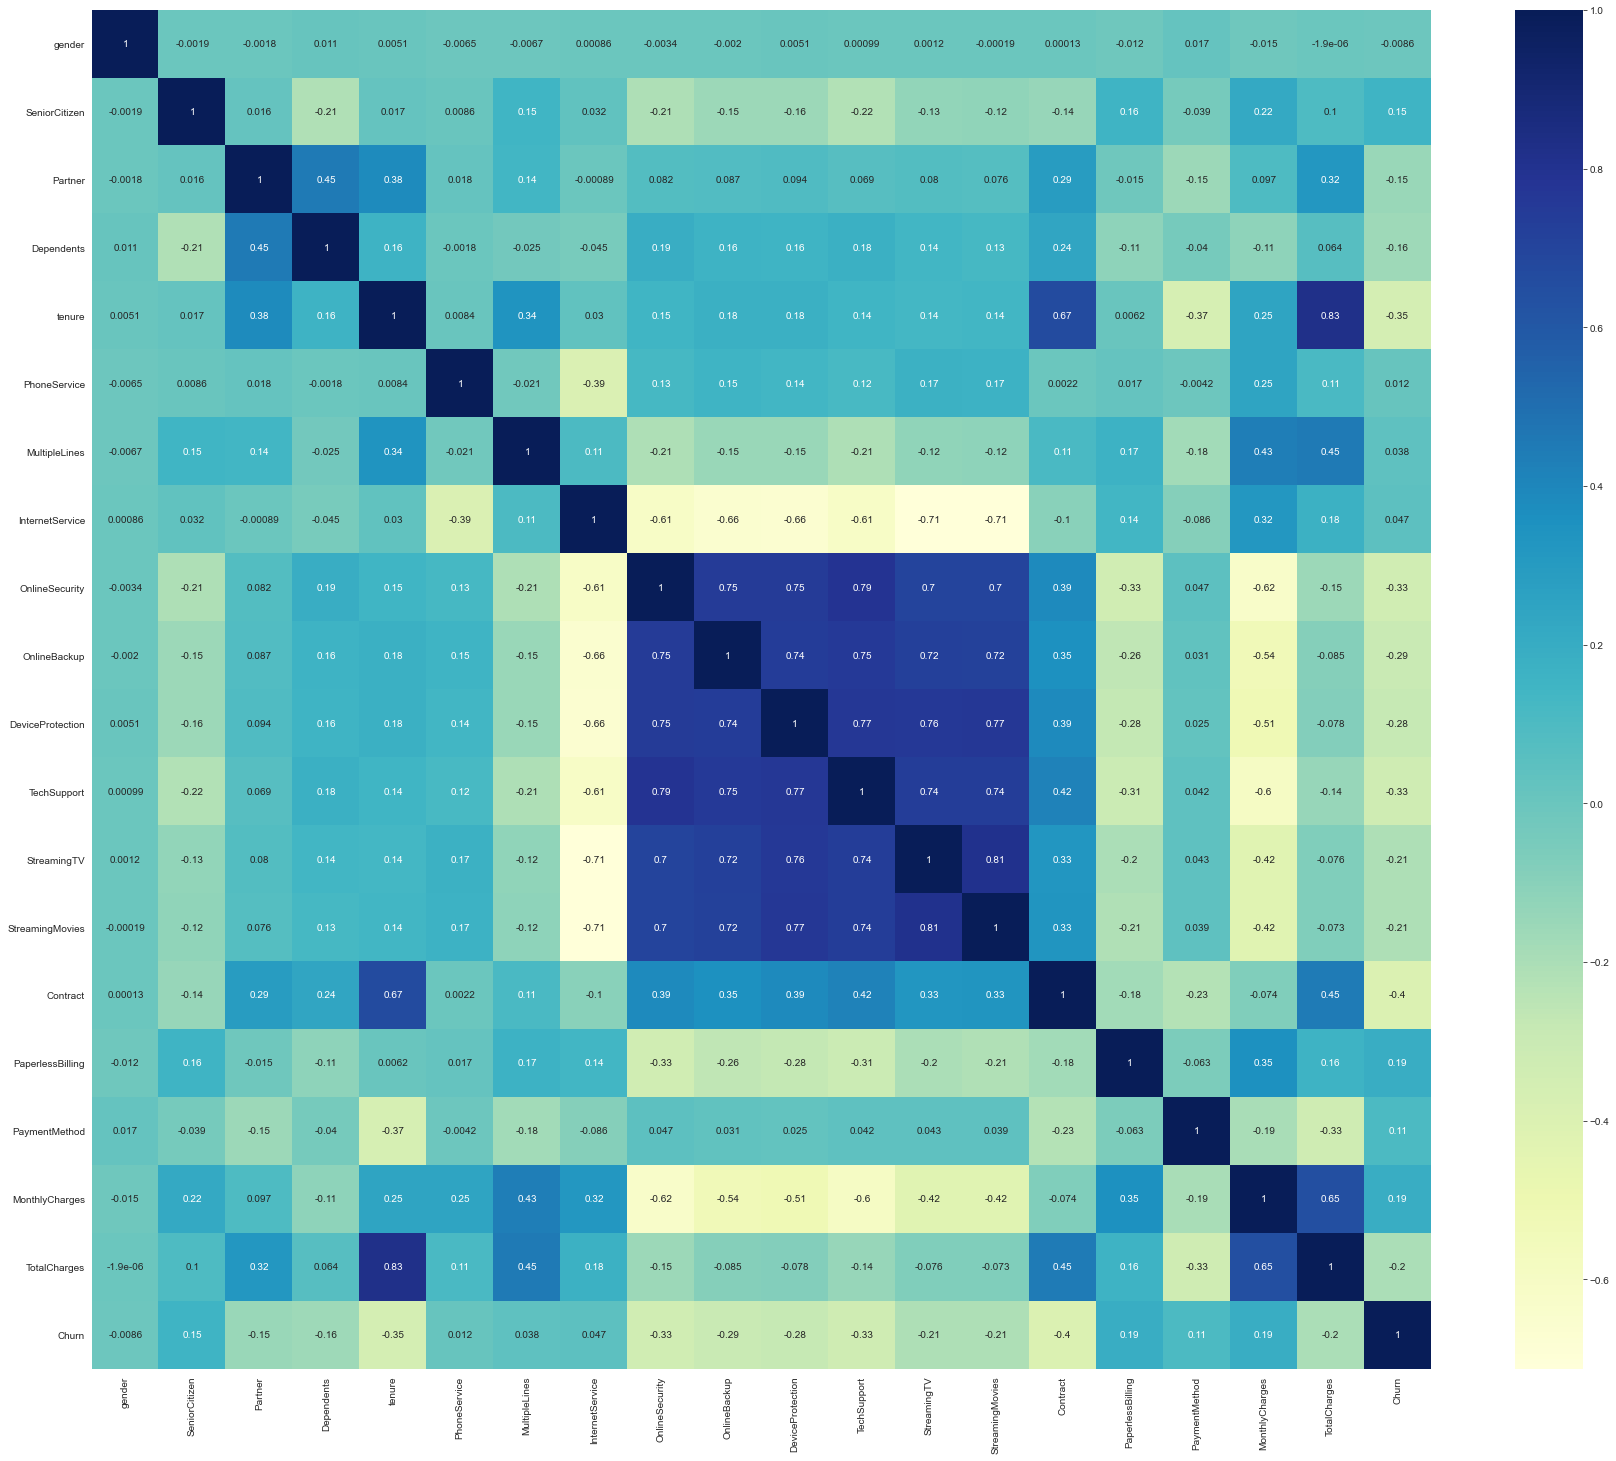

In [34]:
corr=df_proc.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(30,25))
sns.heatmap(corr,annot=True,cmap="YlGnBu")


**TARGET VARIABLE**

In [35]:
count_no_churn = (df_proc['Churn'] == 0).sum()
print("Number of customers who didn't churn:",count_no_churn)
count_yes_churn = (df_proc['Churn']==1).sum()
print("Number of customers who churnes:",count_yes_churn)
pct_of_no_churn = count_no_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who didn't churn:", pct_of_no_churn*100)
pct_of_yes_churn = count_yes_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who churned:", pct_of_yes_churn*100)

Number of customers who didn't churn: 5174
Number of customers who churnes: 1869
percentage of customers who didn't churn: 73.4630129206304
percentage of customers who churned: 26.536987079369588


In [36]:
# split df_proc in feature matrix and target vector
X=df_proc.drop('Churn', axis=1)
y=df_proc['Churn']

# split df_proc between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [37]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,2,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,2,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


### *Split train and test data*

In [38]:
# cross-validation function
def val_model(X, y, clf, quite=False):
  """
    Make cross-validation for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      clf: classifier from scikit-learn
      quite: bool, indicate if funcion should print the results

    # Returns
      float, validation scores

  """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("recall: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

def getClfRecallScores(X_train, y_train, *clf_list):
  """
  Provides recall score gor a given list of models

  # Arguments
    X_train: X_train
    y_train: y_train
    *clf_list: list of classifiers

  # Returns
    DataFrame, recall scores

  """

  model_name = []
  recall = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    recall.append(val_model(X_train, y_train, model))
  
  return pd.DataFrame(data=recall, index=model_name, columns=['Recall']).sort_values(by='Recall', ascending=False)

### *Balancing the data*

Column Churn is the target variable to be used to train the ML models. The class No have much more entries then class Yes, which demonstrates that the dataset is highly imbalanced. Ideally the dataset should be balanced to avoid models overfitting.

In [39]:
# under sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [40]:
get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_rus, header='After balancing:')

# make sure the number of classes are equal distibuted
np.unique(y_train_rus, return_counts=True)

Before balancing: 
# Attributes:  19 
# Entries:  4930 

After balancing: 
# Attributes:  19 
# Entries:  2632 



(array([0, 1]), array([1316, 1316], dtype=int64))

## *Standardizing the data*

In [41]:
# standardizing X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_rus = scaler.fit_transform(X_train_rus)
X_test = scaler.transform(X_test)

## *Create baseline using Cross Validation*

To compare their performances, as a first step, I applied Cross-Validation method

The top-performers were SVM (0.79 Recall score) and LogisticRegression (0.79 Recall score)

In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# instaciate models
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

df_scores = getClfRecallScores(X_train_rus, y_train_rus, dt, svc, lr, xgb)


print(df_scores)

#####  DecisionTreeClassifier  #####
scores: [0.67680608 0.68939394 0.63878327 0.69581749 0.66920152]
recall: 0.674 (+/- 0.02)
#####  SVC  #####
scores: [0.79847909 0.79924242 0.77946768 0.7756654  0.81749049]
recall: 0.794 (+/- 0.02)
#####  LogisticRegression  #####
scores: [0.79847909 0.81439394 0.80228137 0.78707224 0.81749049]
recall: 0.804 (+/- 0.01)
#####  XGBClassifier  #####
scores: [0.7756654  0.77651515 0.72623574 0.7756654  0.79847909]
recall: 0.771 (+/- 0.02)
                          Recall
LogisticRegression      0.803943
SVC                     0.794069
XGBClassifier           0.770512
DecisionTreeClassifier  0.674000


## *Tuning Models*
As LogisticRegression and SVC performed better in terms of Recall metric, I'm going to use those to tune the hyperparameters and check if it can deliver even better results.

**Logistic Regression**

The logistic regression model showed a slight improvement after being tuned, moving Recall score from 0.79 to 0.81. Nonetheless, it has a smaller rate of false positives. Practically, it means you will be able to engage with 81% of the customers who will 

In [43]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.8184122594768983 for {'C': 0.001, 'solver': 'liblinear'}


In [44]:
#print(accuracy_score())

# Deploment Preparation

In [45]:
#pickle.dump(result, open('model.pkl','wb'))

In [46]:
model_lr = LogisticRegression(solver='newton-cg', C=0.001)
model_lr.fit(X_train_rus, y_train_rus)
y_pred_lr = model_lr.predict(X_test)
lr_corr = confusion_matrix(y_test, y_pred_lr, normalize='true')
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1560
           1       0.48      0.80      0.60       553

    accuracy                           0.72      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.72      0.73      2113



**SVM Model**

The  SVM model performed much better, it shifted from 0.79 to 0.95. This means the implemented ML model based on SVM delivers 95% of precision while predicting customer churn. On the other hand, it has a high rate of false positives, which means 63% of satisfied customers can be incorrectly predicted as churn

In [47]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 1, 10, 100] }

search = GridSearchCV(SVC(), param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.9589728079271806 for {'C': 0.001, 'kernel': 'poly'}


In [48]:
model_svm = SVC(kernel='poly', C=0.01)
model_svm.fit(X_train_rus, y_train_rus)
y_pred_svm = model_svm.predict(X_test)
svm_corr = confusion_matrix(y_test, y_pred_svm, normalize='true')

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.39      0.55      1560
           1       0.35      0.93      0.51       553

    accuracy                           0.53      2113
   macro avg       0.64      0.66      0.53      2113
weighted avg       0.78      0.53      0.54      2113



In [49]:
pickle.dump(result, open('model.pkl','wb'))

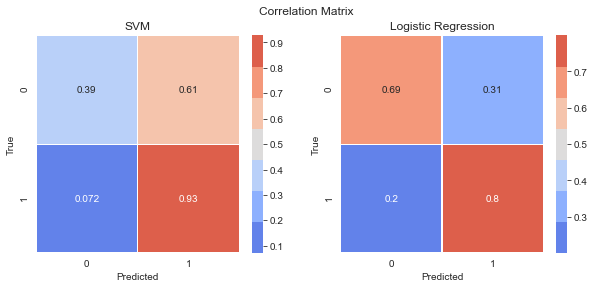

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Correlation Matrix')

sns.heatmap(svm_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[0])
ax[0].set_title('SVM')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(lr_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[1])
ax[1].set_title('Logistic Regression')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

fig.savefig("correlation_.png", dpi=600)

## Conclusion

No algorithm will predict churn with 100% accuracy. There will always be a trade-off between precision and recall. That's why it's important to test and understand the strengths and weaknesses of each classifier and get the best out of each. 

If the goal is to engage and reach out to the customers to prevent them from churning, it's acceptable to engage with those who are mistakenly tagged as 'not churned,' as it does not cause any negative problem. It could potentially make them even happier with the service. This is the kind of model that can add value from day one if proper action is taken out of it.

